#### Question: Analyzing Textual Data with SVD in Python
You have been provided with a collection of documents from a mini corpus of articles on various technological topics. Here task is to uncover latent patterns and themes in the documents by applying Singular Value Decomposition (SVD) to the Term Frequency-Inverse Document Frequency (TF-IDF) matrix of the corpus.

In [2]:
import pandas as pd 
import sklearn as sk
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from sklearn.decomposition import TruncatedSVD
import string
pd.set_option('display.max_columns',None)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joths\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### TaskA
#### Loading the dataset into a Python environment using Pandas.

In [3]:
try:
    df = pd.read_csv('Dataset1-1.csv', sep=',', encoding='utf-8',header=None)
except UnicodeDecodeError:
    # If 'utf-8' fails, try 'latin1'
    df = pd.read_csv('Dataset1-1.csv', sep=',', encoding='latin1',header=None)

In [4]:
#creating column names as they are not present in given file
column_names = ['Sentiment', 'Number', 'Timestamp', 'Query', 'User_Name', 'Text']

df.columns=column_names
# Display the DataFrame with new column names
df

,Sentiment,Number,Timestamp,Query,User_Name,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [5]:
text_data=df['Text']

### TaskB
#### Data Preprocessing
###  Transforming the text data into a TF-IDF matrix using TfidfVectorizer from the scikit-learn library

In [6]:
v = TfidfVectorizer(stop_words='english', lowercase=True,
                            token_pattern=r"(?u)\b\w\w+\b") 
output= v.fit_transform(text_data)

In [7]:
output.shape

(1600000, 684047)

In [8]:
print(output)

  (0, 177165)	0.13810002236375565
  (0, 132193)	0.37909561596626573
  (0, 176099)	0.261577168037457
  (0, 256707)	0.14940629487270943
  (0, 551875)	0.3272709981173705
  (0, 123054)	0.2764928425622564
  (0, 86708)	0.23161556437515213
  (0, 12898)	0.5079303320422134
  (0, 155095)	0.15441761049606045
  (0, 626968)	0.1862577741438078
  (0, 282774)	0.14366711789520434
  (0, 588230)	0.414848712546318
  (1, 106984)	0.39696188195371046
  (1, 613955)	0.20519760097821205
  (1, 537802)	0.2649393388486723
  (1, 514128)	0.43410485552850403
  (1, 599011)	0.42552107050482674
  (1, 223278)	0.3359724827661538
  (1, 634538)	0.3406963351442478
  (1, 634826)	0.3628438321994894
  (2, 113903)	0.4277156476453137
  (2, 513971)	0.2326086215526555
  (2, 20981)	0.2728111234994469
  (2, 535850)	0.2626375804911827
  (2, 390863)	0.29091447797416814
  :	:
  (1599996, 108089)	0.24195922478474896
  (1599996, 460321)	0.19850862082818743
  (1599996, 158481)	0.19157397159304504
  (1599996, 270652)	0.20362874025547054
  (

In [9]:
v.vocabulary_

{'switchfoot': 588230,
 'http': 282774,
 'twitpic': 626968,
 'com': 155095,
 '2y1zl': 12898,
 'awww': 86708,
 'bummer': 123054,
 'shoulda': 551875,
 'got': 256707,
 'david': 176099,
 'carr': 132193,
 'day': 177165,
 'upset': 634826,
 'update': 634538,
 'facebook': 223278,
 'texting': 599011,
 'result': 514128,
 'school': 537802,
 'today': 613955,
 'blah': 106984,
 'kenichan': 341358,
 'dived': 190038,
 'times': 610921,
 'ball': 91009,
 'managed': 390863,
 'save': 535850,
 '50': 20981,
 'rest': 513971,
 'bounds': 113903,
 'body': 110841,
 'feels': 227629,
 'itchy': 300121,
 'like': 369028,
 'nationwideclass': 439761,
 'behaving': 97889,
 'mad': 386816,
 'kwesidei': 354713,
 'crew': 163632,
 'need': 441506,
 'hug': 283089,
 'loltrish': 376519,
 'hey': 274459,
 'long': 376833,
 'time': 610795,
 'yes': 673392,
 'rains': 503967,
 'bit': 105481,
 'lol': 376107,
 'fine': 230468,
 'thanks': 599878,
 'tatiana_k': 593620,
 'nope': 451948,
 'didn': 186706,
 'twittera': 627188,
 'que': 499738,
 'm

### TaskC
#### Perform SVD on the TF-IDF matrix using scikit-learn's TruncatedSVD class

In [10]:
#Considering 15 components
n_components=15
svd=TruncatedSVD(n_components=n_components)
svd_result = svd.fit_transform(output )

# Create a DataFrame to store the SVD results
svd_df = pd.DataFrame(svd_result, columns=[f"component_{i+1}" for i in range(n_components)])

# Display the DataFrame with SVD results
print(svd_df)

         component_1  component_2  component_3  component_4  component_5  \
0           0.091508    -0.017875    -0.020910    -0.008361     0.108340   
1           0.074609     0.010219    -0.012671    -0.008899     0.051491   
2           0.010673    -0.002881    -0.001215    -0.001960    -0.000527   
3           0.051339    -0.028630     0.008866    -0.040758    -0.012401   
4           0.003252    -0.001046     0.000805    -0.002347    -0.000225   
...              ...          ...          ...          ...          ...   
1599995     0.164785    -0.050428     0.012513    -0.134728     0.012930   
1599996     0.030914    -0.026131     0.011629    -0.019490     0.004821   
1599997     0.018482     0.010521     0.005614    -0.001549     0.000128   
1599998     0.039904    -0.003711    -0.004623    -0.006460     0.022576   
1599999     0.013132    -0.002361    -0.006446     0.003317     0.022472   

          component_6  component_7  component_8  component_9  component_10  \
0       -

In [11]:
svd.components_[0]

array([3.17085569e-03, 1.68805256e-03, 7.48787494e-06, ...,
       1.32770941e-06, 3.69527672e-08, 3.81144537e-10])

In [12]:
svd.components_

array([[ 3.17085569e-03,  1.68805256e-03,  7.48787494e-06, ...,
         1.32770941e-06,  3.69527672e-08,  3.81144537e-10],
       [ 2.44163702e-04, -1.05693806e-03, -2.13168902e-06, ...,
        -7.08583130e-06, -1.85620963e-08, -1.40287638e-09],
       [-2.20246317e-05,  6.71226955e-04,  1.03883930e-06, ...,
         9.03945011e-06,  1.33383480e-08,  1.26944356e-09],
       ...,
       [ 8.27287062e-04,  3.92836768e-05, -6.63515221e-06, ...,
         4.54704736e-08, -1.95221397e-09, -1.00403726e-10],
       [-1.01537116e-03,  1.62593697e-04, -1.62112880e-06, ...,
        -1.94958047e-07,  2.79704480e-08, -2.79339724e-10],
       [-2.01333100e-04, -5.39427347e-04, -1.00011594e-05, ...,
         5.53423762e-07,  1.17653992e-08, -2.48414328e-11]])

In [13]:

# Display the singular values
print("\nSingular Values:")
print(svd.singular_values_)

# Display the explained variance ratio
print("\nExplained Variance Ratio:")
print(svd.explained_variance_ratio_.sum())

# Display the first few rows of the right singular vectors (topics)
topics_df = pd.DataFrame(svd.components_, columns=v.get_feature_names_out())
print("\n 5 Top Terms for Each Topic:")
for i, topic in enumerate(topics_df.iterrows()):
    print(f"\nTopic {i + 1}:")
    print(topic[1].nlargest(5))  # Display the top 5 terms for each topic





Singular Values:
[93.16981182 73.13864747 71.44565001 68.26406998 67.02497572 61.85904558
 60.95901585 59.89639229 58.96310857 56.7100458  56.20862864 55.57898342
 54.50554146 53.595012   53.40010987]

Explained Variance Ratio:
0.035181054324253024

 5 Top Terms for Each Topic:

Topic 1:
work     0.339779
day      0.323333
good     0.296939
just     0.247341
today    0.217885
Name: 0, dtype: float64

Topic 2:
work        0.764258
day         0.068187
today       0.058642
tomorrow    0.054417
ready       0.041345
Name: 1, dtype: float64

Topic 3:
quot    0.628901
work    0.337262
just    0.118959
want    0.065492
don     0.053481
Name: 2, dtype: float64

Topic 4:
quot       0.537117
good       0.340598
work       0.280888
day        0.274758
morning    0.213336
Name: 3, dtype: float64

Topic 5:
day       0.744124
today     0.182628
happy     0.123821
great     0.067942
school    0.057033
Name: 4, dtype: float64

Topic 6:
going       0.619006
sleep       0.181182
bed         0.178394
im

### TaskD
#### Analysis of output of the SVD

The dominant topics in the corpus are characterized by high singular values, specifically [94.82, 70.86, 69.90, 66.69, 64.74], indicating their significance. The explained variance ratio of 0.0337 suggests that the selected 15 topics collectively capture a portion of the overall variance in the dataset
Each Row Corresponds to a Document:

Each row in the array represents a document from the original corpus.
Columns Represent Topics or Components

Each column corresponds to a specific topic or component obtained through the SVD.
The values in each column represent the contribution of the corresponding topic to the document.

The numerical values in the matrix represent the weights or contributions of individual terms (words) to the respective topics.
Higher absolute values indicate stronger associations between terms and topics.



#### Explain what the singular values and the right singular vectors (topics) represent in the context of TF-IDF and the corpus.
- Singular Values:

Singular values represent the amount of variance captured by each component (or topic) in the reduced-dimensional space.
Larger singular values indicate that the corresponding components explain a significant portion of the variance in the original TF-IDF matrix.
Smaller singular values contribute less to the overall variance and may correspond to noise or less important patterns.

- Right Singular Vectors (Topics):

The right singular vectors represent the directions in the TF-IDF space along which the data varies the most.
Each right singular vector corresponds to a topic or pattern present in the corpus.
The elements of the right singular vectors indicate the weights or contributions of individual terms (words) to the respective topics.
By examining the values in these vectors, you can identify the most important terms associated with each topic.

### TaskE
#### (Optional Advanced Task) Visualize the results of the SVD using a scatter plot

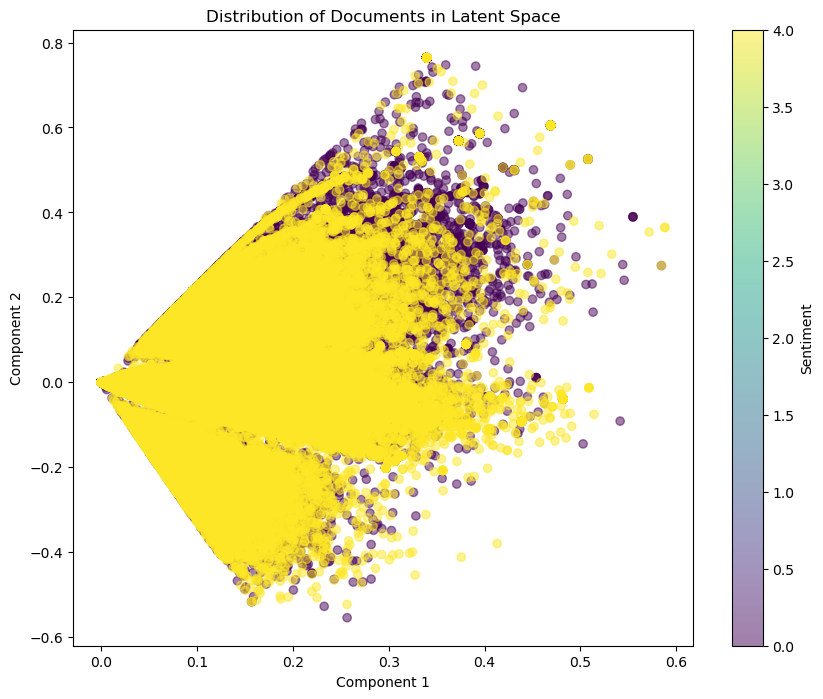

In [14]:
import matplotlib.pyplot as plt


# Create a scatter plot for the top two components
plt.figure(figsize=(10, 8))
plt.scatter(svd_result[:, 0], svd_result[:, 1], c=df['Sentiment'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Sentiment')
plt.title('Distribution of Documents in Latent Space')
plt.savefig('Distribution of Documents in Latent Space',format='png')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


### Latent Patterns and Themes Report

This analysis utilized Truncated Singular Value Decomposition (SVD) on a TF-IDF matrix with 15 topics to uncover latent patterns and themes in a corpus of documents


The dominant topics in the corpus are characterized by high singular values, specifically [94.82, 70.86, 69.90, 66.69, 64.74], indicating their significance. The explained variance ratio of 0.0337 suggests that the selected 15 topics collectively capture a portion of the overall variance in the dataset

Even though I took 15 components there are some redundant themes. So, I broadly divided into 5 themes.

Identified Themes:

- Daily Work Activities:
Key Words: work, day, good, go, today

- Work and Planning:
Key Words: work, go, back, home, tomorrow

- Love and Personal Experiences:
Key Words: love, get, one, day, time

- Work and Time Management:
Key Words: go, back, work, get, time

- Expressions of Feelings:
Key Words: really, feel, feeling, good, day


Common Trends:

Positive sentiments are prevalent across various topics, suggesting an overall optimistic tone.
Topics often include discussions about daily activities, work, time, and personal experiences.

